**to do**  
* Nr_jobs for awesome cosine top

In [1]:
import json

# Needed to load in custom package from upper dir
# Not needed if you pip installed the package
import sys
sys.path.insert(1, '../')

# Custom packages
from polyfuzz.models import EditDistance, TFIDF, Embeddings, BaseMatcher
from polyfuzz import PolyFuzz
# Reload packages
%load_ext autoreload
%autoreload 2

In [3]:
with open("../data/company_names.json") as outfile:
    company_names = json.load(outfile)

with open("../data/movie_titles.json") as outfile:
    movie_titles = json.load(outfile)

In [2]:
from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

In [2]:
model = PolyFuzz("TF-IDF").match(from_list = ["string_one", "string_two"],
                                    to_list = ["string_three", "string_four"])

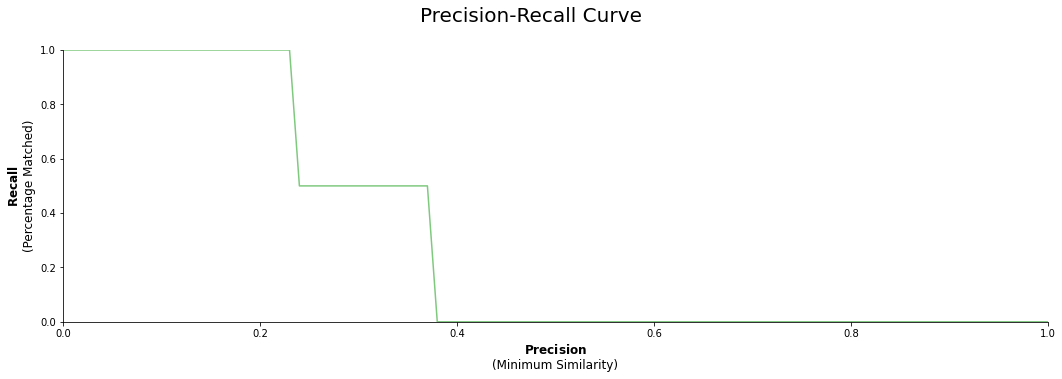

In [29]:
model.visualize_precision_recall(kde=False)

In [3]:
from rapidfuzz import fuzz
import numpy as np
import pandas as pd


class MyModel(BaseMatcher):
    def match(self, from_list, to_list):
        # Calculate distances
        matches = [[fuzz.ratio(from_string, to_string) / 100 for to_string in to_list] for from_string in from_list]
        
        # Get best matches
        mappings = [to_list[index] for index in np.argmax(matches, axis=1)]
        scores = np.max(matches, axis=1)
        
        # Prepare dataframe
        matches = pd.DataFrame({'From': from_list,'To': mappings, 'Similarity': scores})
        return matches

models = [
          TFIDF(n_gram_range=(3, 3), min_similarity=0, model_id="TF-IDF-Sklearn"),
          TFIDF(n_gram_range=(3, 6), min_similarity=0),
#           EditDistance(n_jobs=-1),
#           Embeddings([bert_embedding], min_similarity=0),
#           MyModel()
         ]
model=Embeddings([bert_embedding], min_similarity=0),


# pm = PolyFuzz(models, movie_titles["Netflix"], movie_titles["Netflix"]).match()
# model = pf.PolyFuzz(models, movie_titles["Netflix"][:1000], movie_titles["IMDB"][:1000]).match()
# pm = PolyMatch(models, company_names[:5_000], company_names[:5_000]).match()
model = pf.PolyFuzz(model).match(from_list = ["string_one", "string_two"],
                                  to_list = ["string_three", "string_four"])

# pm = PolyFuzz("TF-IDF", movie_titles["Netflix"], movie_titles["Netflix"]).match()
# pm = PolyMatch("EditDistance", movie_titles["Netflix"], movie_titles["Netflix"]).match()
# pm = PolyMatch("Embeddings", movie_titles["Netflix"], movie_titles["Netflix"]).match()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 13.02it/s]

['string_three', 'string_four'] [1 1]


C:\Users\Maarten\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Maarten\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\programdata\miniconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


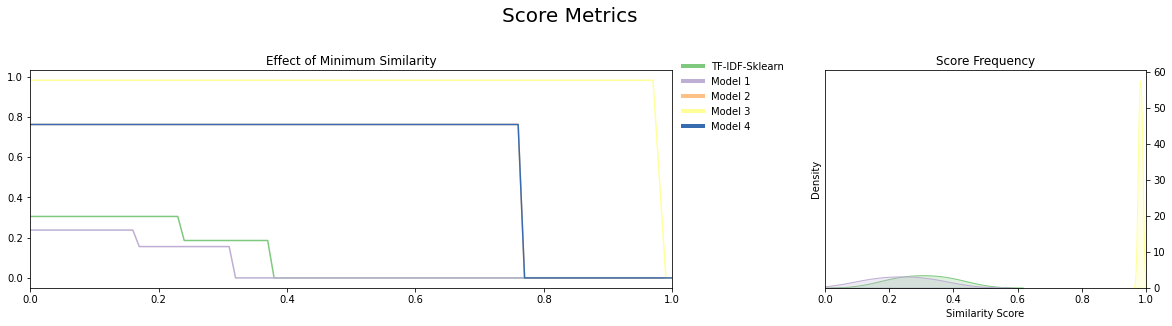

In [15]:
model.visualize_precision_recall()

In [19]:
min_precision, recall, _ = precision_recall_curve(pm.matches["Model 1"])

In [26]:
pm.group(minimum_similarity=0.8); 
df = pm.matches["Model 1"]

In [27]:
pm.get_all_model_ids()

['TF-IDF-Sklearn', 'Model 1', 'Model 2', 'Model 3', 'Model 4']

In [28]:
pm.matches["Model 4"]

,From,To,Similarity,Group
0,Norm of the North: King Sized Adventure,Norm of the North: King Sized Adventure,1.0,Norm of the North: King Sized Adventure
1,Jandino: Whatever it Takes,Jandino: Whatever it Takes,1.0,Jandino: Whatever it Takes
2,Transformers Prime,Transformers Prime,1.0,Transformer
3,Transformers: Robots in Disguise,Transformers: Robots in Disguise,1.0,Transformers: Robots in Disguise
4,#realityhigh,#realityhigh,1.0,#realityhigh
...,...,...,...,...
6167,Kikoriki,Kikoriki,1.0,Kikoriki
6168,Red vs. Blue,Red vs. Blue,1.0,Red vs. Blue
6169,Maron,Maron,1.0,Maron
6170,A Young Doctor's Notebook and Other Stories,A Young Doctor's Notebook and Other Stories,1.0,A Young Doctor's Notebook and Other Stories


## Edit distance

In [1]:
from polyfuzz.models import EditDistance
from rapidfuzz import fuzz

In [2]:
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

matcher = EditDistance(n_jobs=1, scorer=fuzz.ratio, normalize=False)
result = matcher.match(from_list, to_list)

## RapidFuzz

In [3]:
from polyfuzz.models import RapidFuzz

In [4]:
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

matcher = RapidFuzz(score_cutoff=0.91)
result = matcher.match(from_list, to_list)

# TF-IDF

In [5]:
from polyfuzz.models import TFIDF

In [6]:
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

matcher = TFIDF(n_gram_range=(5, 5))
result = matcher.match(from_list, to_list)

In [7]:
result.head()

,From,To,Similarity
0,apple,apple,1.0
1,apples,apples,1.0
2,appl,None,0.0
3,recal,None,0.0
4,house,None,0.0


In [8]:
result.Similarity.mean()

0.3333333333333333

# Embeddings

In [1]:
import numpy as np
from polyfuzz.models import Embeddings

with open('../tests/from_list.npy', 'rb') as f:
    from_vector = np.load(f)
    
with open('../tests/to_list.npy', 'rb') as f:
    to_vector = np.load(f)
    
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

In [2]:
model = Embeddings(embedding_method="None", min_similarity=0)
model.match(from_list, to_list, from_vector, to_vector)

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apples,1.000000
2,appl,apple,0.289289
3,recal,apples,0.202621
4,house,apple,0.347237
5,similarity,apples,0.325309


In [16]:
type(from_vector)

numpy.ndarray

In [23]:
from flair.embeddings import FlairEmbeddings, TransformerWordEmbeddings, TransformerDocumentEmbeddings
bert_embedding = TransformerWordEmbeddings('bert-base-multilingual-cased')

In [24]:
model = Embeddings([bert_embedding], min_similarity=0.0)
matches = model.match(["string_one", "string_two"],
                      ["string_three", "string_four"])